In [48]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="darkgrid")
sns.set(style="ticks", color_codes=True)

In [49]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

In [50]:
df = pd.read_excel("D:\DataScience\DataSet\Speed_Dating_Data.xlsx", encoding='ISO-8859-1')
df.describe()

,gender,wave,match,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr,sinc,intel,fun,amb,like,prob,met
count,8378.000000,8378.000000,8378.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,8128.000000,8060.000000,7993.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8211.000000,8270.000000,8270.000000,8270.000000,8270.000000,8270.000000,8270.000000,8270.000000,8270.000000,8270.000000,8270.000000,8270.000000,8270.000000,8270.000000,8270.000000,8270.000000,8270.000000,8270.000000,8248.000000,8147.000000,8072.000000,8053.000000,7999.000000,7637.000000,8109.000000,8040.000000,7974.000000
mean,0.500597,11.350919,0.164717,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,6.134498,5.208251,1.960215,26.358928,7.662488,2.757186,3.784793,3.651645,2.122063,5.006762,5.289368,6.421403,4.574244,6.243168,7.784885,6.984039,6.710036,5.729141,3.879323,5.750181,7.679081,5.294800,6.777267,7.915840,6.821161,7.848730,5.626481,4.331681,5.534433,6.187971,7.171705,7.366571,6.399675,6.778774,6.130127,5.207525,0.951843
std,0.500029,5.995903,0.370947,0.489051,3.563648,1.230689,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,0.493515,1.950305,1.740575,1.550501,1.954078,1.794080,1.841258,2.129354,0.245925,3.566763,3.758935,1.230905,2.845708,2.805237,1.407181,1.444531,3.309611,2.622646,2.804207,2.422682,1.757602,2.055403,2.266090,2.571208,2.620735,2.504027,2.009840,2.527949,2.237223,1.702702,2.158058,1.794287,2.612222,2.719240,1.734822,1.950344,1.741646,1.551680,1.954990,1.795916,1.841129,2.131630,0.990201
min,0.000000,1.000000,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,0.000000,0.000000,24.000000,2.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,0.000000,5.000000,6.000000,6.000000,5.000000,6.000000,5.000000,4.000000,2.000000,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,5.000000,4.000000,0.000000
50%,1.000000,11.000000,0.000000,0.000000,26.000000,2.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,5.000000,2.000000,26.000000,8.000000,2.000000,3.000000,3.000000,2.000000,5.000000,6.000000,7.000000,4.000000,6.000000,8.000000,7.000000,7.000000,6.000000,3.000000,6.000000,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,6.000000,4.000000,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,5.000000,0.000000
75%,1.000000,15.000000,0.000000,1.000000,28.000000,4.000000,25.000000,20.000000,23.810000,20.000000,15.000000,16.000000,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,2.000000,28.000000,10.000000,4.000000,6.000000,6.000000,2.000000,6.000000,7.000000,9.000000,7.000000,8.000000,9.000000,9.000000,8.000000,8.000000,6.000000,8.000000,9.000000,7.000000,9.000000,9.000000,8.000000,9.000000,8.000000,7.000000,7.000

In [51]:
df['age_o'].value_counts()

27.0    1059
23.0     894
26.0     869
24.0     863
25.0     837
28.0     746
22.0     651
29.0     589
30.0     574
21.0     289
32.0     210
33.0     161
34.0     152
31.0     125
35.0      60
20.0      54
36.0      45
42.0      20
19.0      19
38.0      19
39.0      18
18.0       9
55.0       6
37.0       5
Name: age_o, dtype: int64

In [52]:
#delete outliers
df.drop(df[df['age_o'] > 50].index, inplace = True)   

In [53]:
df.head()

,gender,wave,match,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,like_o,prob_o,met_o,age,field,field_cd,race,imprace,imprelig,from,goal,date,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr,sinc,intel,fun,amb,like,prob,met
0,0,1,0,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,7.0,8.0,7.0,6.0,4.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,8.0,10.0,9.0,8.0,7.0,5.0,5.0,2.0
1,0,1,1,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,1,8.0,8.0,10.0,7.0,6.0,8.0,4.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,2.0
2,0,1,1,0,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,5.0,10.0,10.0,6.0,6.0,8.0,5.0,2.0
3,0,1,1,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,7.0,8.0,8.0,7.0,7.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,10.0,9.0,8.0,8.0,7.0,7.0,5.0,2.0
4,0,1,1,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,7.0,9.0,8.0,9.0,7.0,7.0,8.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,5.0,10.0,8.0,8.0,5.0,5.0,5.0,2.0


In [54]:
df.isnull().sum()

gender        0
wave          0
match         0
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
amb_o       722
like_o      249
prob_o      318
met_o       385
age          95
field        63
field_cd     82
race         63
imprace      79
imprelig     79
from         79
goal         79
date         97
career       89
career_c    167
sports      108
tvsports    108
exercise    108
dining      108
museums     108
art         108
hiking      108
gaming      108
clubbing    108
reading     108
tv          108
theater     108
movies      108
concerts    108
music       108
shopping    108
yoga        108
exphappy    130
attr        231
sinc        306
intel       324
fun         378
amb         740
like        269
prob        337
met         404
dtype: int64

In [55]:
df = df.dropna()

In [56]:
df.isnull().sum()

gender      0
wave        0
match       0
samerace    0
age_o       0
race_o      0
pf_o_att    0
pf_o_sin    0
pf_o_int    0
pf_o_fun    0
pf_o_amb    0
pf_o_sha    0
dec_o       0
attr_o      0
sinc_o      0
intel_o     0
fun_o       0
amb_o       0
like_o      0
prob_o      0
met_o       0
age         0
field       0
field_cd    0
race        0
imprace     0
imprelig    0
from        0
goal        0
date        0
career      0
career_c    0
sports      0
tvsports    0
exercise    0
dining      0
museums     0
art         0
hiking      0
gaming      0
clubbing    0
reading     0
tv          0
theater     0
movies      0
concerts    0
music       0
shopping    0
yoga        0
exphappy    0
attr        0
sinc        0
intel       0
fun         0
amb         0
like        0
prob        0
met         0
dtype: int64

In [57]:
df["match"] = df["match"].apply(lambda x: "Yes" if x == 1 else "No" )
df.head()

,gender,wave,match,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,like_o,prob_o,met_o,age,field,field_cd,race,imprace,imprelig,from,goal,date,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr,sinc,intel,fun,amb,like,prob,met
0,0,1,No,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,7.0,8.0,7.0,6.0,4.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,8.0,10.0,9.0,8.0,7.0,5.0,5.0,2.0
1,0,1,Yes,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,1,8.0,8.0,10.0,7.0,6.0,8.0,4.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,2.0
2,0,1,Yes,0,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,5.0,10.0,10.0,6.0,6.0,8.0,5.0,2.0
3,0,1,Yes,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,7.0,8.0,8.0,7.0,7.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,10.0,9.0,8.0,8.0,7.0,7.0,5.0,2.0
4,0,1,Yes,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,7.0,9.0,8.0,9.0,7.0,7.0,8.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,5.0,10.0,8.0,8.0,5.0,5.0,5.0,2.0


In [58]:
df["gender"] = df["gender"].apply(lambda x: "Male" if x == 1 else "Female" )
df.head()

,gender,wave,match,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,like_o,prob_o,met_o,age,field,field_cd,race,imprace,imprelig,from,goal,date,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr,sinc,intel,fun,amb,like,prob,met
0,Female,1,No,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,7.0,8.0,7.0,6.0,4.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,8.0,10.0,9.0,8.0,7.0,5.0,5.0,2.0
1,Female,1,Yes,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,1,8.0,8.0,10.0,7.0,6.0,8.0,4.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,2.0
2,Female,1,Yes,0,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,5.0,10.0,10.0,6.0,6.0,8.0,5.0,2.0
3,Female,1,Yes,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,7.0,8.0,8.0,7.0,7.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,10.0,9.0,8.0,8.0,7.0,7.0,5.0,2.0
4,Female,1,Yes,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,7.0,9.0,8.0,9.0,7.0,7.0,8.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,5.0,10.0,8.0,8.0,5.0,5.0,5.0,2.0


In [59]:
df["samerace"] = df["samerace"].apply(lambda x: "Yes" if x == 1 else "No" )
df.head()

,gender,wave,match,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,like_o,prob_o,met_o,age,field,field_cd,race,imprace,imprelig,from,goal,date,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr,sinc,intel,fun,amb,like,prob,met
0,Female,1,No,No,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,7.0,8.0,7.0,6.0,4.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,8.0,10.0,9.0,8.0,7.0,5.0,5.0,2.0
1,Female,1,Yes,No,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,1,8.0,8.0,10.0,7.0,6.0,8.0,4.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,2.0
2,Female,1,Yes,No,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,5.0,10.0,10.0,6.0,6.0,8.0,5.0,2.0
3,Female,1,Yes,No,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,7.0,8.0,8.0,7.0,7.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,10.0,9.0,8.0,8.0,7.0,7.0,5.0,2.0
4,Female,1,Yes,No,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,7.0,9.0,8.0,9.0,7.0,7.0,8.0,2.0,26.0,Masters in Public Administration,13.0,6.0,1.0,1.0,"Palm Springs, California",1.0,4.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,5.0,10.0,8.0,8.0,5.0,5.0,5.0,2.0


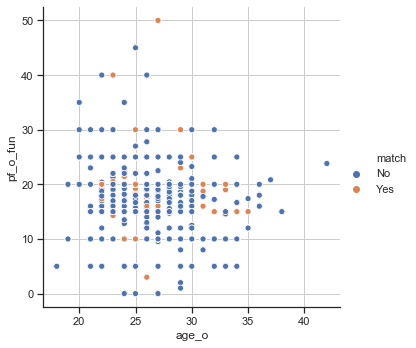

In [60]:
sns.relplot(x="age_o", y="pf_o_fun", hue="match", data=df)
plt.grid()

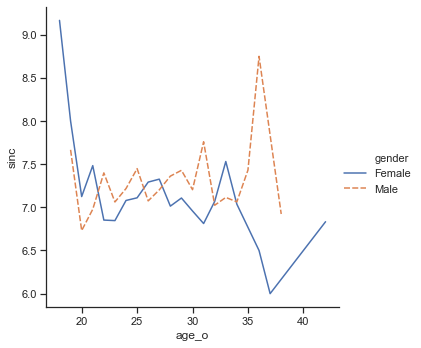

In [61]:
sns.relplot(x="age_o", y="sinc", ci=None, hue="gender", kind="line", style="gender", data=df)

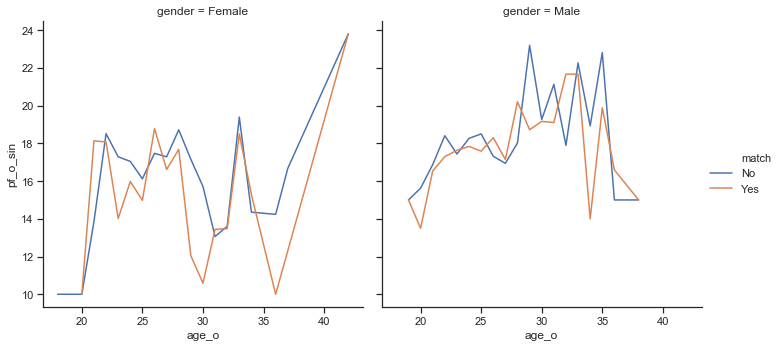

In [62]:
sns.relplot(x="age_o", y="pf_o_sin", ci=None, kind="line", hue="match",col="gender",data=df)

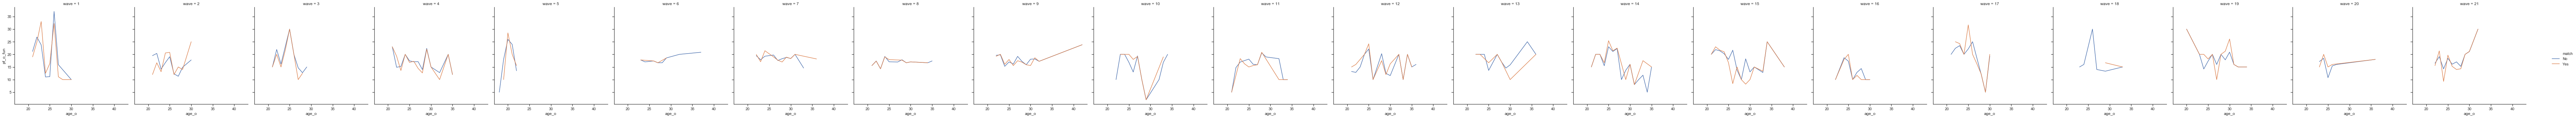

In [63]:
sns.relplot(x="age_o", y="pf_o_fun", ci=None, kind="line", hue="match",col="wave",data=df)
            

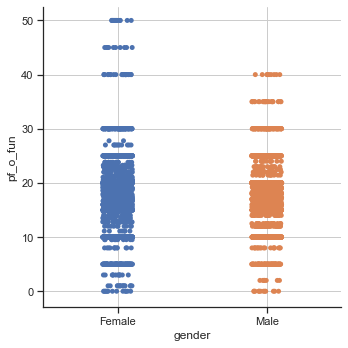

In [64]:
sns.catplot(x="gender", y="pf_o_fun", data=df)
plt.grid()

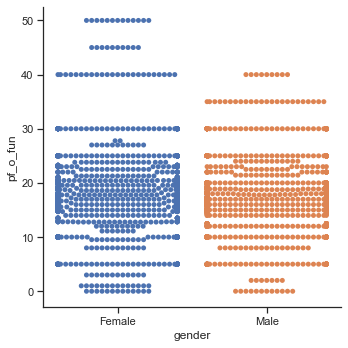

In [106]:
sns.catplot(x="gender", y="pf_o_fun", kind="swarm", data=df)
plt.rcParams['figure.figsize'] = [10/2.54, 8/2.54]

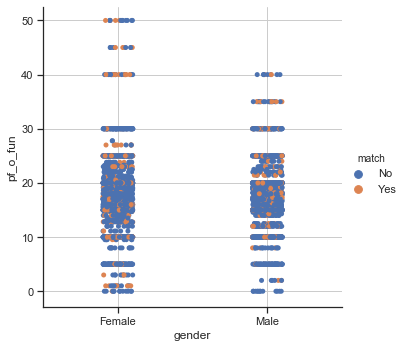

In [69]:
sns.catplot(x="gender", y="pf_o_fun", hue="match", data=df)
plt.grid()

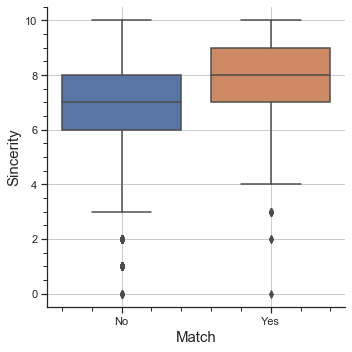

In [78]:
sns.catplot(x="match", y="sinc", kind="box", data=df)
plt.xlabel('Match', fontsize=15)
plt.ylabel('Sincerity', fontsize=15)
plt.minorticks_on()
plt.grid()

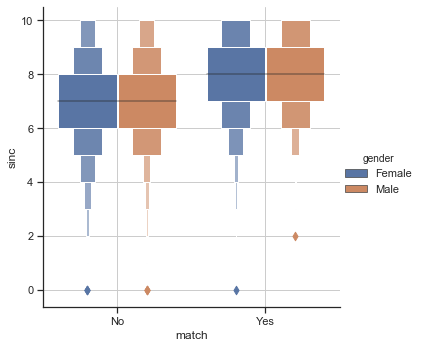

In [84]:
sns.catplot(x="match", y="sinc", hue="gender", kind="boxen", data=df)

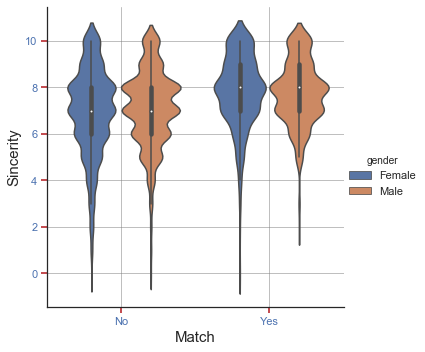

In [87]:
sns.catplot(x="match", y="sinc", hue="gender", kind="violin", data=df)
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor='b', colors='r', grid_color='gray', grid_alpha=0.5)
plt.xlabel('Match', fontsize=15)
plt.ylabel('Sincerity', fontsize=15)
plt.grid()

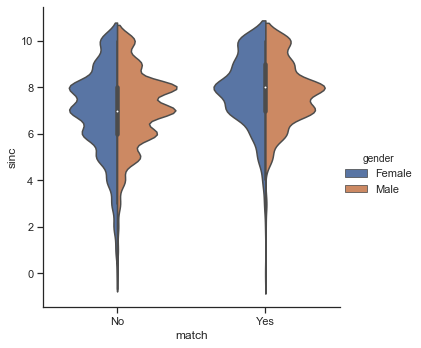

In [88]:
sns.catplot(x="match", y="sinc", hue="gender", kind="violin", split=True, data=df);  

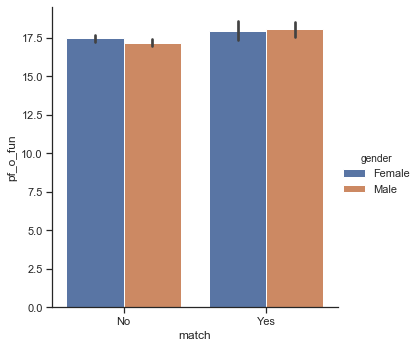

In [89]:
sns.catplot(x="match", y="pf_o_fun", hue="gender", kind="bar", data=df);  

In [90]:
df['age'] = df['age_o'].apply(lambda x: "> 35" if x > 34
                                else "30 à 34" if x > 29
                                else "25 à 29" if x > 24
                                else "< 24" )

In [91]:
df['age'].value_counts()

25 à 29    3046
< 24       2165
30 à 34     902
> 35         99
Name: age, dtype: int64

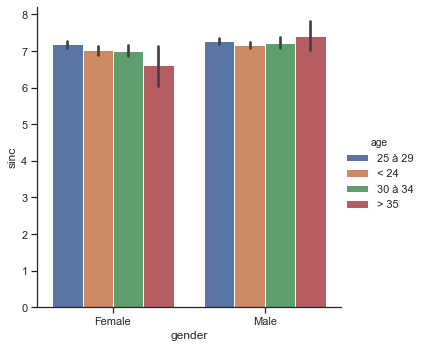

In [92]:
sns.catplot(x="gender", y="sinc", hue="age", kind="bar", data=df)

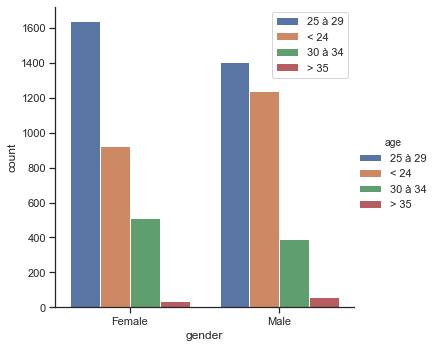

In [105]:
sns.catplot(x="gender", hue="age", kind="count", data=df)

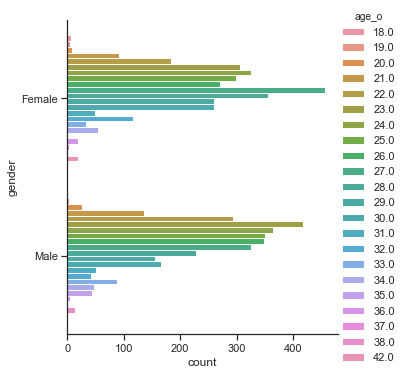

In [94]:
sns.catplot(y="gender", hue="age_o", kind="count", data=df);  

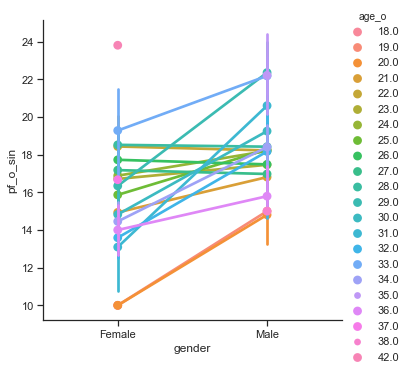

In [95]:
sns.catplot(x="gender", y="pf_o_sin", hue="age_o", kind="point", data=df);  

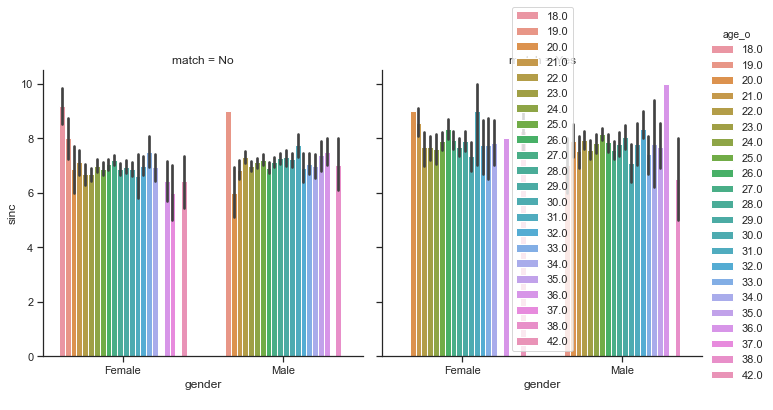

In [102]:
sns.catplot(x="gender", y="sinc", col="match", hue="age_o", kind="bar", data=df)

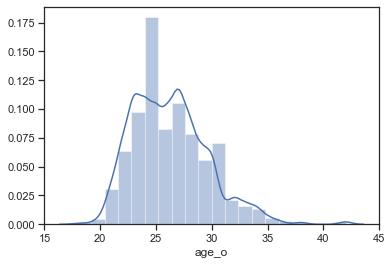

In [104]:
sns.distplot(df["age_o"], bins=20)

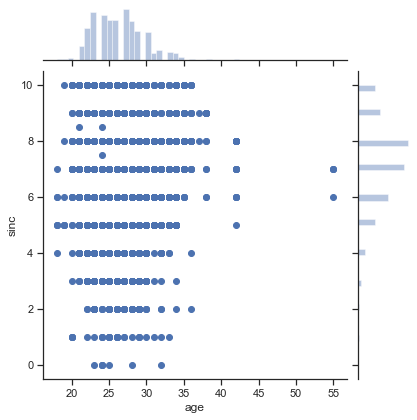

In [266]:
sns.jointplot(x=df["age"], y=df["sinc"], data=df)

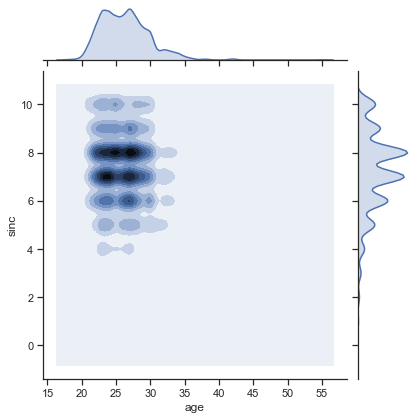

In [268]:
sns.jointplot(x=df["age"], y=df["sinc"], kind="kde", data=df)